In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../Project-4-Credit-Worthiness/Resources/train_final.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good,12,-1,1,2
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good,12,1,1,3
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good,12,1,1,4
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good,12,1,1,5
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good,12,1,1,1


In [80]:
unique_values = df.nunique()
unique_values

ID                           100000
Customer_ID                   12500
Month                             8
Name                          10128
Age                              43
SSN                           12500
Occupation                       15
Annual_Income                 12488
Monthly_Inhand_Salary         13241
Num_Bank_Accounts                12
Num_Credit_Card                  12
Interest_Rate                    34
Num_of_Loan                      10
Type_of_Loan                   6261
Delay_from_due_date              63
Num_of_Delayed_Payment           26
Changed_Credit_Limit           3452
Num_Credit_Inquiries             18
Credit_Mix                        3
Outstanding_Debt              12203
Credit_Utilization_Ratio     100000
Credit_History_Age              404
Payment_of_Min_Amount             3
Total_EMI_per_month           11890
Amount_invested_monthly       12261
Payment_Behaviour                 6
Monthly_Balance               98494
Credit_Score                

In [4]:
df.shape

(100000, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  int64  
 1   Customer_ID                100000 non-null  int64  
 2   Month                      100000 non-null  int64  
 3   Name                       99990 non-null   object 
 4   Age                        100000 non-null  float64
 5   SSN                        100000 non-null  float64
 6   Occupation                 99995 non-null   object 
 7   Annual_Income              100000 non-null  float64
 8   Monthly_Inhand_Salary      100000 non-null  float64
 9   Num_Bank_Accounts          99979 non-null   float64
 10  Num_Credit_Card            100000 non-null  float64
 11  Interest_Rate              100000 non-null  float64
 12  Num_of_Loan                100000 non-null  float64
 13  Type_of_Loan               100

In [6]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,99979.000000,100000.000000,100000.00000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.369948,5.533570,14.53208,...,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586,6.39346,0.771000,1.403190,2.469040
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.592419,2.067098,8.74133,...,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719,4.63016,1.144575,0.693378,2.035471
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760,-1.00000,-1.000000,0.000000,-1.000000
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983,2.00000,0.000000,1.000000,1.000000
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366,6.00000,1.000000,2.000000,2.000000
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683,10.00000,2.000000,2.000000,5.000000
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696,14.00000,2.000000,2.000000,5.000000


In [7]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                          10
Age                            0
SSN                            0
Occupation                     5
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts             21
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                   620
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour            571
Monthly_Balance                0
Credit_Score                   0
Occupation_Num                 0
Credit_Mix_Num                 0
Payment_of

In [8]:
df1 = df.drop(["ID","Customer_ID","Month","Name","Occupation","Type_of_Loan","Payment_of_Min_Amount","Total_EMI_per_month","Amount_invested_monthly","SSN"],axis=1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  float64
 1   Annual_Income              100000 non-null  float64
 2   Monthly_Inhand_Salary      100000 non-null  float64
 3   Num_Bank_Accounts          99979 non-null   float64
 4   Num_Credit_Card            100000 non-null  float64
 5   Interest_Rate              100000 non-null  float64
 6   Num_of_Loan                100000 non-null  float64
 7   Delay_from_due_date        100000 non-null  float64
 8   Num_of_Delayed_Payment     100000 non-null  float64
 9   Changed_Credit_Limit       100000 non-null  float64
 10  Num_Credit_Inquiries       100000 non-null  float64
 11  Credit_Mix                 99380 non-null   object 
 12  Outstanding_Debt           100000 non-null  float64
 13  Credit_Utilization_Ratio   100

In [10]:
df1 = df1.dropna()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98791 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        98791 non-null  float64
 1   Annual_Income              98791 non-null  float64
 2   Monthly_Inhand_Salary      98791 non-null  float64
 3   Num_Bank_Accounts          98791 non-null  float64
 4   Num_Credit_Card            98791 non-null  float64
 5   Interest_Rate              98791 non-null  float64
 6   Num_of_Loan                98791 non-null  float64
 7   Delay_from_due_date        98791 non-null  float64
 8   Num_of_Delayed_Payment     98791 non-null  float64
 9   Changed_Credit_Limit       98791 non-null  float64
 10  Num_Credit_Inquiries       98791 non-null  float64
 11  Credit_Mix                 98791 non-null  object 
 12  Outstanding_Debt           98791 non-null  float64
 13  Credit_Utilization_Ratio   98791 non-null  flo

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df["Age"].apply(is_float)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num


In [13]:
def convert_to_Float(x):
    if isinstance(x, str):
        age = x.split("_")[0]  # Split the string and take the first part
        return float(age)
    elif isinstance(x, float):
        return x  # Return the float as is
    else:
        raise ValueError(f"Unsupported type: {type(x)}")  # Handle other types if necessary

df1["Age"] = df1["Age"].apply(convert_to_Float)


In [14]:
df1 = df1[df1["Age"] >= 10]
df1 = df1[df1["Age"] <= 100]

In [15]:
df1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Monthly_Balance,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
count,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.00000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000
mean,33.329534,50487.497461,4195.581742,5.372068,5.536608,14.538177,3.534462,21.107044,13.321041,10.475267,5.802583,1428.06059,32.283219,221.165329,392.588353,6.392374,0.781853,1.403731,2.489103
std,10.760945,38292.865173,3185.744927,2.591316,2.067475,8.745806,2.446621,14.811888,6.235749,6.614822,3.868533,1155.70970,5.116954,99.722184,201.640678,4.631082,1.139655,0.693266,2.024128
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.23000,20.000000,1.000000,0.007760,-1.000000,-1.000000,0.000000,-1.000000
25%,24.000000,19333.180000,1625.265833,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.390000,3.000000,566.86000,28.049193,144.000000,267.514752,2.000000,0.000000,1.000000,1.000000
50%,33.000000,36984.760000,3089.665000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1167.04000,32.303684,219.000000,333.692954,6.000000,1.000000,2.000000,3.000000
75%,42.000000,71690.420000,5959.676250,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.860000,9.000000,1950.62000,36.495333,302.000000,463.131823,10.000000,2.000000,2.000000,5.000000
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4998.07000,50.000000,404.000000,1183.930696,14.000000,2.000000,2.000000,5.000000


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98791 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        98791 non-null  float64
 1   Annual_Income              98791 non-null  float64
 2   Monthly_Inhand_Salary      98791 non-null  float64
 3   Num_Bank_Accounts          98791 non-null  float64
 4   Num_Credit_Card            98791 non-null  float64
 5   Interest_Rate              98791 non-null  float64
 6   Num_of_Loan                98791 non-null  float64
 7   Delay_from_due_date        98791 non-null  float64
 8   Num_of_Delayed_Payment     98791 non-null  float64
 9   Changed_Credit_Limit       98791 non-null  float64
 10  Num_Credit_Inquiries       98791 non-null  float64
 11  Credit_Mix                 98791 non-null  object 
 12  Outstanding_Debt           98791 non-null  float64
 13  Credit_Utilization_Ratio   98791 non-null  flo

In [17]:
df1[~df1["Annual_Income"].apply(is_float)]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num


In [18]:
df1["Annual_Income"] =df1["Annual_Income"].apply(convert_to_Float)

In [19]:
df1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Monthly_Balance,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
count,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.00000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000
mean,33.329534,50487.497461,4195.581742,5.372068,5.536608,14.538177,3.534462,21.107044,13.321041,10.475267,5.802583,1428.06059,32.283219,221.165329,392.588353,6.392374,0.781853,1.403731,2.489103
std,10.760945,38292.865173,3185.744927,2.591316,2.067475,8.745806,2.446621,14.811888,6.235749,6.614822,3.868533,1155.70970,5.116954,99.722184,201.640678,4.631082,1.139655,0.693266,2.024128
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.23000,20.000000,1.000000,0.007760,-1.000000,-1.000000,0.000000,-1.000000
25%,24.000000,19333.180000,1625.265833,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.390000,3.000000,566.86000,28.049193,144.000000,267.514752,2.000000,0.000000,1.000000,1.000000
50%,33.000000,36984.760000,3089.665000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1167.04000,32.303684,219.000000,333.692954,6.000000,1.000000,2.000000,3.000000
75%,42.000000,71690.420000,5959.676250,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.860000,9.000000,1950.62000,36.495333,302.000000,463.131823,10.000000,2.000000,2.000000,5.000000
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4998.07000,50.000000,404.000000,1183.930696,14.000000,2.000000,2.000000,5.000000


In [20]:
bins = [df1['Annual_Income'].quantile(0), df1['Annual_Income'].quantile(0.2), df1['Annual_Income'].quantile(0.4),
        df1['Annual_Income'].quantile(0.6), df1['Annual_Income'].quantile(0.8), df1['Annual_Income'].quantile(1)]

labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df1['Salary_Range'] = pd.cut(df1['Annual_Income'], bins=bins, labels=labels)

df1

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num,Salary_Range
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,26.822620,265.0,High_spent_Small_value_payments,312.494089,Good,12,-1,1,2,Low
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,31.944960,266.0,Low_spent_Large_value_payments,284.629162,Good,12,1,1,3,Low
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,28.609352,267.0,Low_spent_Medium_value_payments,331.209863,Good,12,1,1,4,Low
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,31.377862,268.0,Low_spent_Small_value_payments,223.451310,Good,12,1,1,5,Low
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,24.797347,269.0,High_spent_Medium_value_payments,341.489231,Good,12,1,1,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,34.663572,378.0,High_spent_Large_value_payments,479.866228,Poor,9,-1,1,0,Medium
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,40.565631,379.0,High_spent_Medium_value_payments,496.651610,Poor,9,-1,1,1,Medium
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,41.255522,380.0,High_spent_Large_value_payments,516.809083,Poor,9,1,1,0,Medium
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,33.638208,381.0,Low_spent_Large_value_payments,319.164979,Standard,9,1,1,3,Medium


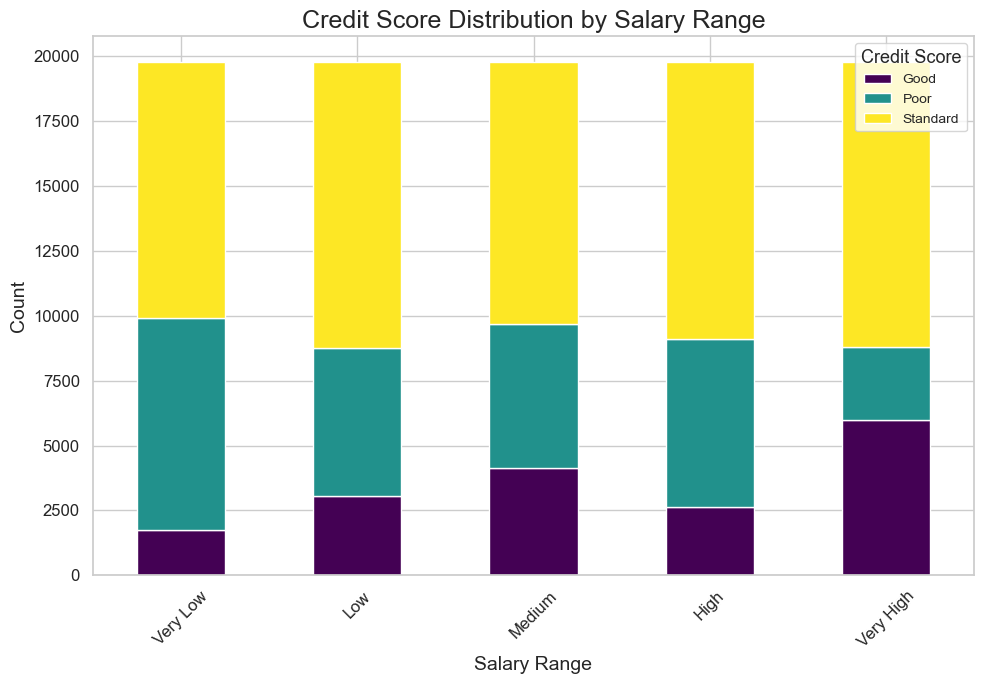

In [21]:
pivot_table = pd.pivot_table(df1, values='Annual_Income', index='Salary_Range',
                             columns='Credit_Score', aggfunc='count', fill_value=0)

# Use Seaborn to set the aesthetics for better appearance
sns.set_theme(style="whitegrid")

# Plot a bar graph with better aesthetics
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')

# Title and labels with increased font sizes for better readability
plt.title('Credit Score Distribution by Salary Range', fontsize=18)
plt.xlabel('Salary Range', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the legend
plt.legend(title='Credit Score', fontsize='small', title_fontsize='13')

# Beautify the x and y axis ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding a tight layout to ensure everything fits without overlapping
plt.tight_layout()

# Show plot with an attractive layout
plt.show()


In [22]:
df2 = df1[df1["Annual_Income"] < 12*df1["Monthly_Inhand_Salary"]]

In [23]:
df2.groupby("Credit_Score")["Credit_Score"].agg("count")

Credit_Score
Good         8390
Poor        14181
Standard    25514
Name: Credit_Score, dtype: int64

In [24]:
df1["Num_Bank_Accounts"] = df1["Num_Bank_Accounts"].apply(lambda x: abs(x) if x !=0 else x+1)

In [25]:
df1.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Monthly_Balance,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
count,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.00000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000,98791.000000
mean,33.329534,50487.497461,4195.581742,5.415898,5.536608,14.538177,3.534462,21.107044,13.321041,10.475267,5.802583,1428.06059,32.283219,221.165329,392.588353,6.392374,0.781853,1.403731,2.489103
std,10.760945,38292.865173,3185.744927,2.507172,2.067475,8.745806,2.446621,14.811888,6.235749,6.614822,3.868533,1155.70970,5.116954,99.722184,201.640678,4.631082,1.139655,0.693266,2.024128
min,14.000000,7005.930000,303.645417,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.23000,20.000000,1.000000,0.007760,-1.000000,-1.000000,0.000000,-1.000000
25%,24.000000,19333.180000,1625.265833,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.390000,3.000000,566.86000,28.049193,144.000000,267.514752,2.000000,0.000000,1.000000,1.000000
50%,33.000000,36984.760000,3089.665000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1167.04000,32.303684,219.000000,333.692954,6.000000,1.000000,2.000000,3.000000
75%,42.000000,71690.420000,5959.676250,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.860000,9.000000,1950.62000,36.495333,302.000000,463.131823,10.000000,2.000000,2.000000,5.000000
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4998.07000,50.000000,404.000000,1183.930696,14.000000,2.000000,2.000000,5.000000


In [26]:
# df1.drop(["Annual_Income","Monthly_Inhand_Salary"],axis=1,inplace=True)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98791 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        98791 non-null  float64 
 1   Annual_Income              98791 non-null  float64 
 2   Monthly_Inhand_Salary      98791 non-null  float64 
 3   Num_Bank_Accounts          98791 non-null  float64 
 4   Num_Credit_Card            98791 non-null  float64 
 5   Interest_Rate              98791 non-null  float64 
 6   Num_of_Loan                98791 non-null  float64 
 7   Delay_from_due_date        98791 non-null  float64 
 8   Num_of_Delayed_Payment     98791 non-null  float64 
 9   Changed_Credit_Limit       98791 non-null  float64 
 10  Num_Credit_Inquiries       98791 non-null  float64 
 11  Credit_Mix                 98791 non-null  object  
 12  Outstanding_Debt           98791 non-null  float64 
 13  Credit_Utilization_Ratio   9879

In [28]:
df1["Num_of_Loan"] =df1["Num_of_Loan"].apply(convert_to_Float)
df1["Num_of_Delayed_Payment"] = df1["Num_of_Delayed_Payment"].apply(convert_to_Float)

In [29]:
df1["Changed_Credit_Limit"].replace("_","0",inplace=True)
df1["Changed_Credit_Limit"] = df1["Changed_Credit_Limit"].apply(convert_to_Float)

In [30]:
df1["Credit_Mix"].replace("_","Standard",inplace=True)
credit_mix = {"Good":0,"Standard":1,"Bad":2}
df1["Credit_Mix"].replace(credit_mix,inplace=True)

In [31]:
df1["Outstanding_Debt"] = df1["Outstanding_Debt"].apply(convert_to_Float)

In [32]:
def get_year(x):
    # Convert to string before splitting
    x = str(x).split()
    return int(x[0]) if len(x) > 0 and x[0].isdigit() else None

def get_month(x):
    # Convert to string before splitting
    x = str(x).split()
    return int(x[3]) if len(x) > 3 and x[3].isdigit() else None

df1["Credit_History_Year"] = df1["Credit_History_Age"].apply(get_year)
df1["Credit_History_Month"] = df1["Credit_History_Age"].apply(get_month)



In [33]:
df1 = df1.drop("Credit_History_Age",axis=1)

In [34]:
credit_score = {"Good":0,"Standard":1,"Poor":2}
df1["Credit_Score"].replace(credit_score,inplace=True)

In [35]:
df1 = df1[df1["Payment_Behaviour"]!="!@9#%8"]

In [36]:
df1["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [37]:
payment_behavior_dict = {
    'High_spent_Small_value_payments': 0,
    'Low_spent_Small_value_payments': 1,
    'High_spent_Large_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'Low_spent_Medium_value_payments': 5
}

df1["Payment_Behaviour"].replace(payment_behavior_dict,inplace=True)

In [38]:
df1["Salary_Range"]

0           Low
1           Low
2           Low
3           Low
4           Low
          ...  
99995    Medium
99996    Medium
99997    Medium
99998    Medium
99999    Medium
Name: Salary_Range, Length: 98791, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [39]:
df1.isna().sum()

Age                              0
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                     0
Occupation_Num                   0
Credit_Mix_Num                   0
Payment_of_Min_Amount_Num        0
Payment_Behaviour_Num            0
Salary_Range                     8
Credit_History_Year          98791
Credit_History_Month         98791
dtype: int64

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98791 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        98791 non-null  float64 
 1   Annual_Income              98791 non-null  float64 
 2   Monthly_Inhand_Salary      98791 non-null  float64 
 3   Num_Bank_Accounts          98791 non-null  float64 
 4   Num_Credit_Card            98791 non-null  float64 
 5   Interest_Rate              98791 non-null  float64 
 6   Num_of_Loan                98791 non-null  float64 
 7   Delay_from_due_date        98791 non-null  float64 
 8   Num_of_Delayed_Payment     98791 non-null  float64 
 9   Changed_Credit_Limit       98791 non-null  float64 
 10  Num_Credit_Inquiries       98791 non-null  float64 
 11  Credit_Mix                 98791 non-null  int64   
 12  Outstanding_Debt           98791 non-null  float64 
 13  Credit_Utilization_Ratio   9879

In [41]:
salary_range_dict = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}
df1["Salary_Range"].replace(salary_range_dict,inplace=True)

In [42]:
df1 = df1[df1["Monthly_Balance"].apply(is_float)]
# df1["Monthly_Balance"].apply(convert_to_Float)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98791 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        98791 non-null  float64 
 1   Annual_Income              98791 non-null  float64 
 2   Monthly_Inhand_Salary      98791 non-null  float64 
 3   Num_Bank_Accounts          98791 non-null  float64 
 4   Num_Credit_Card            98791 non-null  float64 
 5   Interest_Rate              98791 non-null  float64 
 6   Num_of_Loan                98791 non-null  float64 
 7   Delay_from_due_date        98791 non-null  float64 
 8   Num_of_Delayed_Payment     98791 non-null  float64 
 9   Changed_Credit_Limit       98791 non-null  float64 
 10  Num_Credit_Inquiries       98791 non-null  float64 
 11  Credit_Mix                 98791 non-null  int64   
 12  Outstanding_Debt           98791 non-null  float64 
 13  Credit_Utilization_Ratio   9879

In [44]:
df1 = df1.drop(columns=['Credit_History_Year', 'Credit_History_Month', 'Salary_Range'])


In [45]:
# Count the number of NaN values in each column
nan_counts = df1.isna().sum()
print(nan_counts)

Age                          0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Occupation_Num               0
Credit_Mix_Num               0
Payment_of_Min_Amount_Num    0
Payment_Behaviour_Num        0
dtype: int64


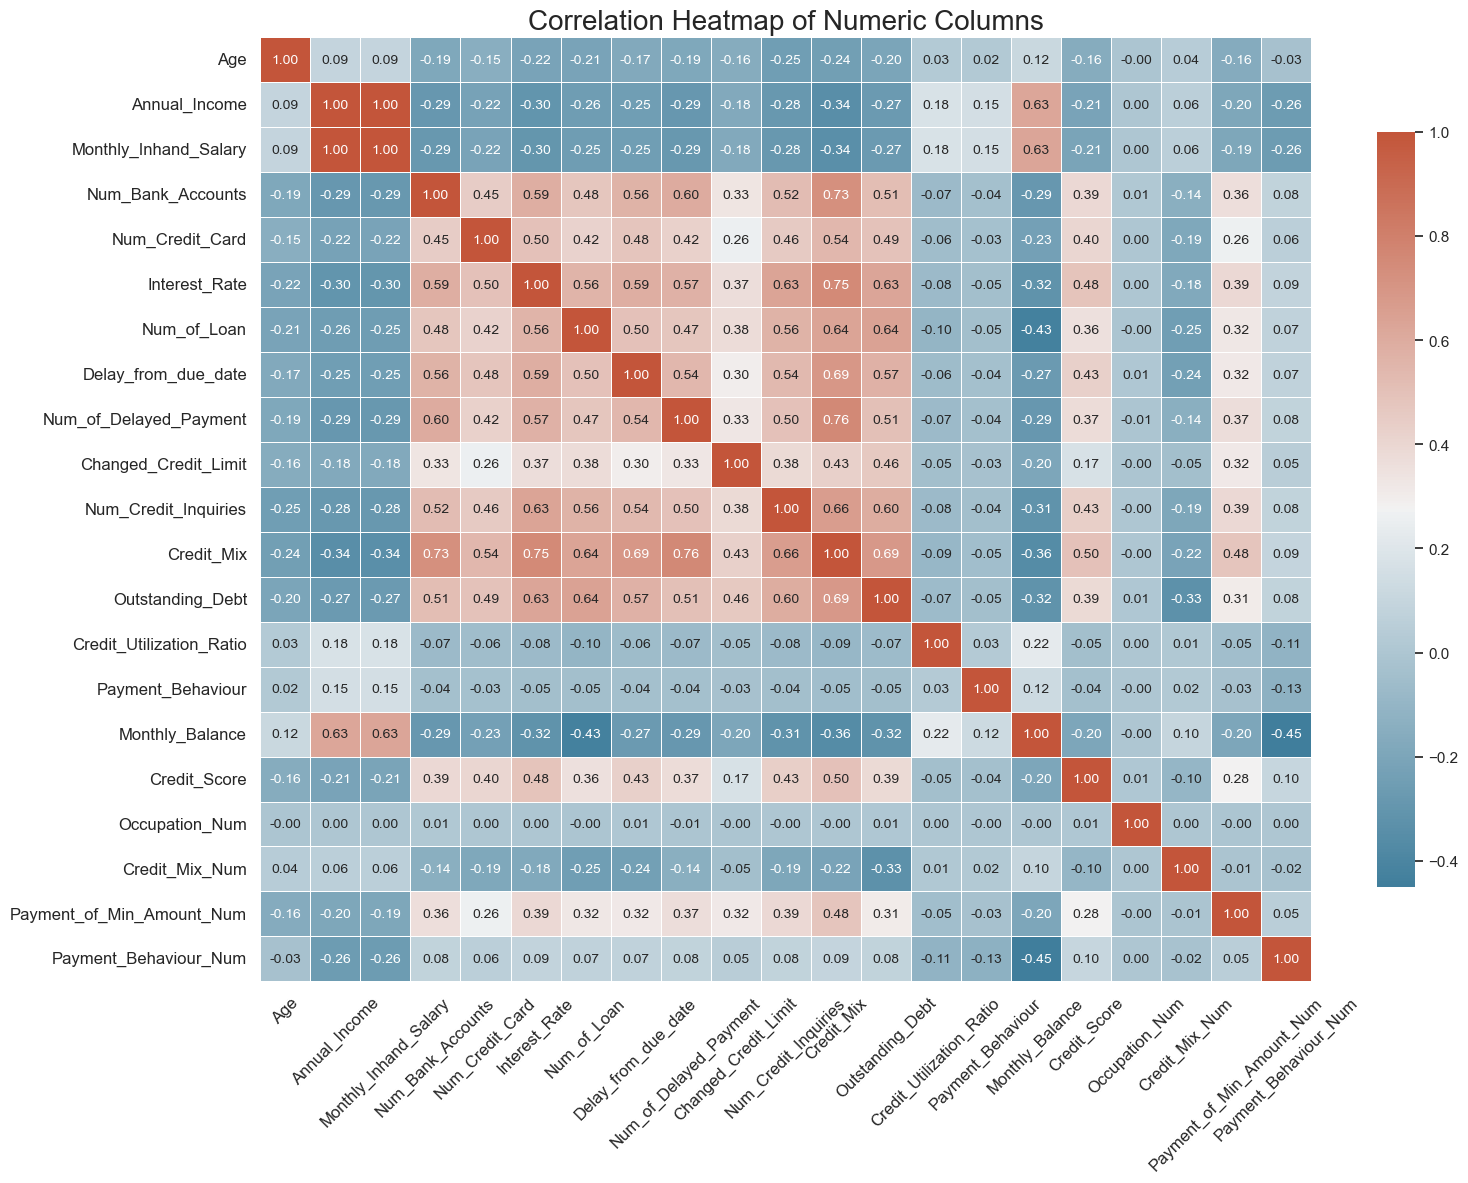

In [46]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

plt.figure(figsize=(16, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5,
            cbar_kws={"shrink": .8}, annot_kws={"size": 10})

plt.title('Correlation Heatmap of Numeric Columns', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()



In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x = df1.drop("Credit_Score",axis=1)
y = df1["Credit_Score"]

from imblearn.over_sampling import RandomOverSampler

# X - independent variables dataframe
# y - dependent variable dataframe

# Define RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Resample the dataset
X_resampled, Y_resampled = ros.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, train_size=0.30, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
rf.score(x_test,y_test)

0.8445731585721796

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     36758
           1       0.83      0.71      0.77     36711
           2       0.85      0.89      0.87     36853

    accuracy                           0.84    110322
   macro avg       0.84      0.84      0.84    110322
weighted avg       0.84      0.84      0.84    110322

Confusion Matrix:
[[34091  2495   172]
 [ 4984 26219  5508]
 [ 1054  2934 32865]]


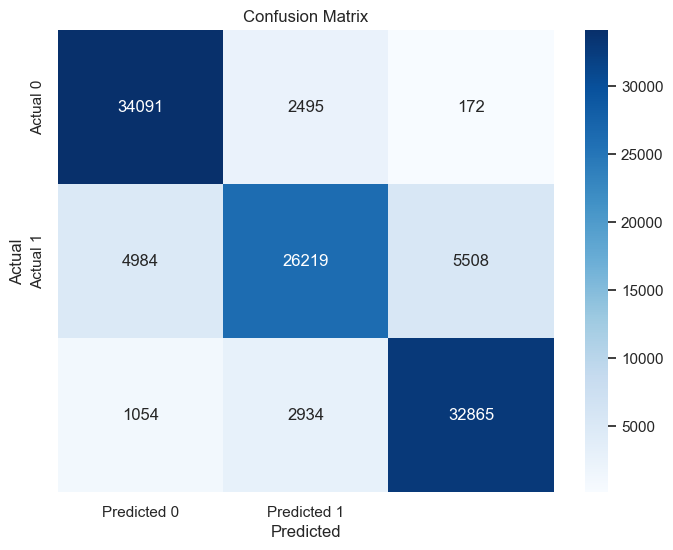

Accuracy Score: 0.84


In [50]:
predictions = rf.predict(x_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions)
print(cm)

# Visualizing Confusion Matrix using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {accuracy:.2f}")


In [51]:
x1 = df1[["Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Delay_from_due_date", "Num_Credit_Inquiries","Credit_Mix", "Outstanding_Debt"]]
y1 = df1["Credit_Score"]

In [52]:
df1.dropna(inplace=True)

In [53]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.30, random_state=42)

In [54]:
rf1 = RandomForestClassifier()
rf1.fit(x1_train, y1_train)

RandomForestClassifier()

In [55]:
rf1.score(x1_test,y1_test)

0.7617346791219597

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     12324
           1       0.78      0.79      0.78     36774
           2       0.76      0.76      0.76     20056

    accuracy                           0.76     69154
   macro avg       0.75      0.75      0.75     69154
weighted avg       0.76      0.76      0.76     69154


Accuracy Score: 76.17%


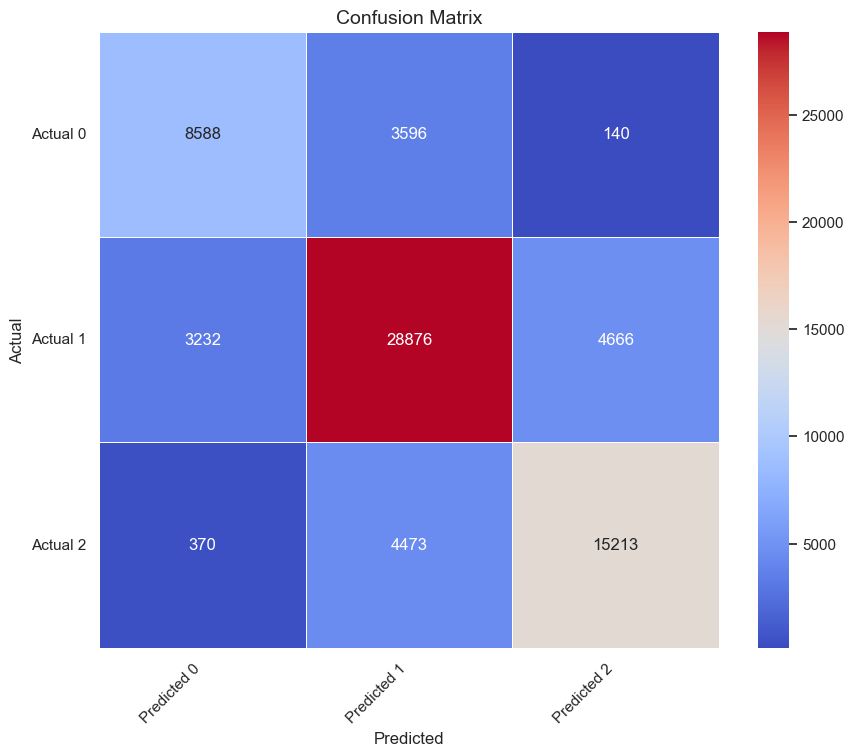

In [60]:
predictions = rf1.predict(x1_test)

# Classification Report
print("Classification Report:")
print(classification_report(y1_test, predictions))

# Accuracy Score
accuracy = accuracy_score(y1_test, predictions)
print(f"\nAccuracy Score: {accuracy * 100:.2f}%")


plt.figure(figsize=(10, 8))  

# Create an enhanced heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', 
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], 
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'],
            cbar=True,  
            linewidths=.5) 

# Enhance labels and title
plt.ylabel('Actual', fontsize=12)  
plt.xlabel('Predicted', fontsize=12)  
plt.title('Confusion Matrix', fontsize=14)  

# Improve the alignment of tick labels
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  

plt.show()




In [64]:
x2 = df1[["Num_Bank_Accounts", "Num_Credit_Card", "Outstanding_Debt", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date", "Num_Credit_Inquiries","Credit_Mix", "Outstanding_Debt"]]
y2 = df1["Credit_Score"]

In [65]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

In [66]:
model = RandomForestClassifier(n_estimators=30, class_weight='balanced')

In [67]:
model.fit(x2_train, y2_train)

RandomForestClassifier(class_weight='balanced', n_estimators=30)

In [68]:
# Making predictions on our model using the test data
predictions = model.predict(x2_test)

In [69]:
rf2 = RandomForestClassifier()
rf2.fit(x2_train, y2_train)

RandomForestClassifier()


Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      5772
           1       0.82      0.79      0.80     17411
           2       0.78      0.81      0.80      9419

    accuracy                           0.79     32602
   macro avg       0.78      0.79      0.78     32602
weighted avg       0.79      0.79      0.79     32602


Accuracy Score: 79.10%


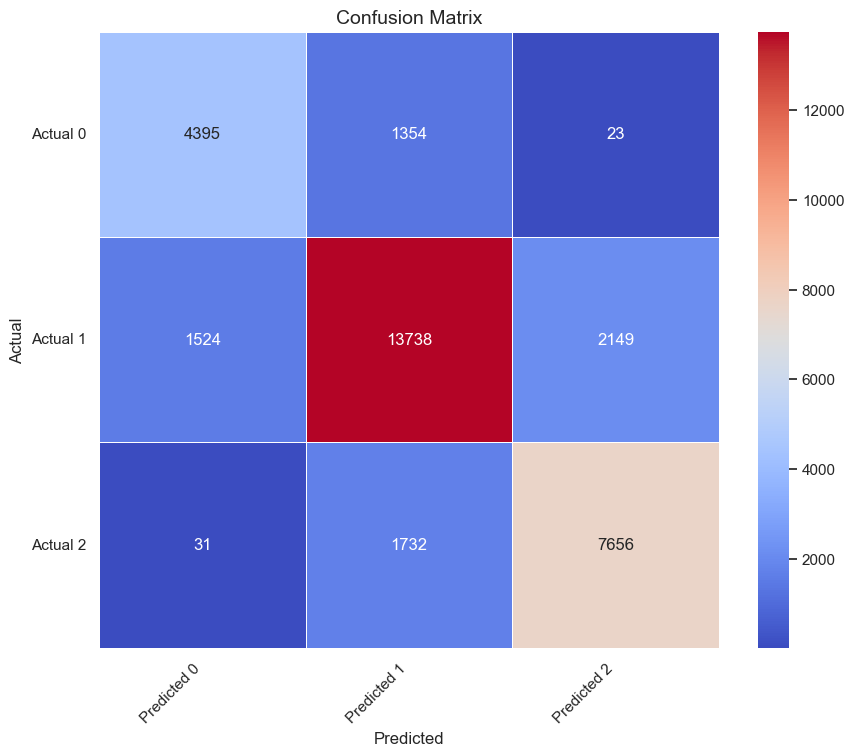

In [74]:
# Generate predictions
predictions = rf2.predict(x2_test)

# Classification report
classification_report_str = classification_report(y2_test, predictions)
print("\nClassification Report:\n")
print(classification_report_str)

# Accuracy score
accuracy = accuracy_score(y2_test, predictions)
print(f"\nAccuracy Score: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 8))  

# Create an enhanced heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', 
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], 
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'],
            cbar=True,  
            linewidths=.5) 

# Enhance labels and title
plt.ylabel('Actual', fontsize=12)  
plt.xlabel('Predicted', fontsize=12)  
plt.title('Confusion Matrix', fontsize=14)  

# Improve the alignment of tick labels
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  

plt.show()





In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
x_sm, y_sm = smote.fit_resample(x,y)
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size= 0.10, random_state= 90, stratify=y_sm)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      5254
           1       0.90      0.81      0.85      5254
           2       0.82      0.92      0.87      2868

    accuracy                           0.88     13376
   macro avg       0.87      0.88      0.88     13376
weighted avg       0.88      0.88      0.88     13376


Accuracy Score: 87.87%


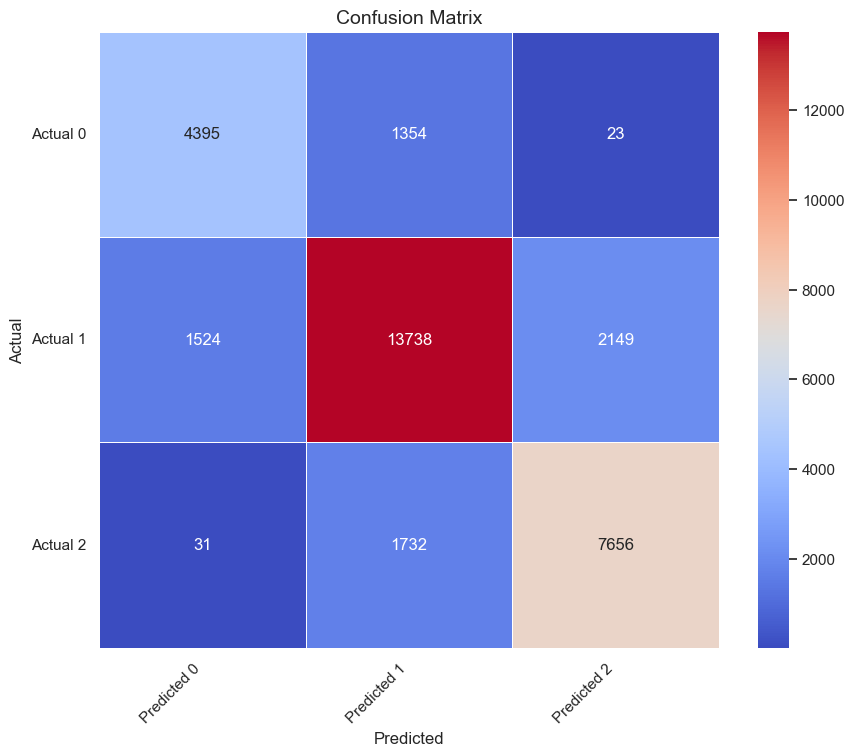

In [78]:
# Generate predictions
predictions = rf.predict(x_test)

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy Score: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 8))  

# Create an enhanced heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', 
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], 
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'],
            cbar=True,  
            linewidths=.5) 

# Enhance labels and title
plt.ylabel('Actual', fontsize=12)  
plt.xlabel('Predicted', fontsize=12)  
plt.title('Confusion Matrix', fontsize=14)  

# Improve the alignment of tick labels
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  

plt.show()

